In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models, datasets
import cv2

In [2]:
num_classes = 10

In [3]:
# Load dataset (example using CIFAR-10)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
# Preprocess images (resize, normalize)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [5]:
# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

In [6]:
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 67s 85ms/step - loss: 1.5686 - accuracy: 0.4257 - val_loss: 1.3163 - val_accuracy: 0.5254
Epoch 2/10
782/782 [==============================] - 57s 73ms/step - loss: 1.2298 - accuracy: 0.5606 - val_loss: 1.2317 - val_accuracy: 0.5525
Epoch 3/10
782/782 [==============================] - 59s 75ms/step - loss: 1.0804 - accuracy: 0.6200 - val_loss: 1.0881 - val_accuracy: 0.6156
Epoch 4/10
782/782 [==============================] - 60s 76ms/step - loss: 0.9747 - accuracy: 0.6570 - val_loss: 0.9939 - val_accuracy: 0.6556
Epoch 5/10
782/782 [==============================] - 56s 72ms/step - loss: 0.9059 - accuracy: 0.6855 - val_loss: 1.0062 - val_accuracy: 0.6513
Epoch 6/10
782/782 [==============================] - 58s 74ms/step - loss: 0.8492 - accuracy: 0.7048 - val_loss: 0.9330 - val_accuracy: 0.6776
Epoch 7/10
782/782 [==============================] - 58s 74ms/step - loss: 0.7962 - accuracy: 0.7203 - val_loss: 0.9452 - val_accuracy:

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.8479 - accuracy: 0.7053
Test accuracy: 0.705299973487854


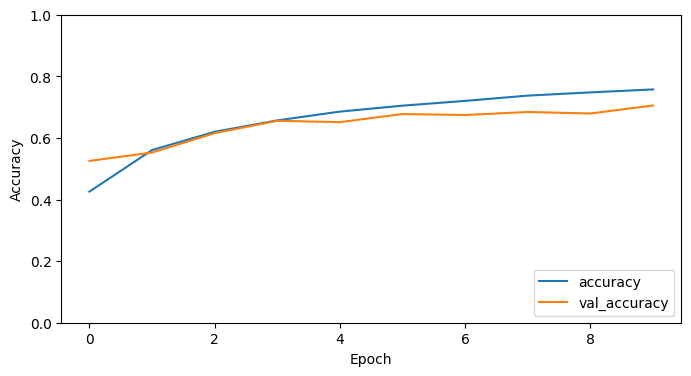

In [10]:
# Plot training/validation accuracy and loss
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [15]:
# Assuming 'model' is your trained Keras model
# Save the model as HDF5 file
model.save('Image-classification-cnn.h5')